<p style="text-align:center;color:crimson;font-size:35px;">EDA and Insight getharing with visulization  </p>

!['Insight Extraction'](http://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWvJfD33yVmmMet3W0p3ABhaHLt5HWIVVKyQ&usqp=CAU)

In [1]:
# import neccesory library

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fitness-consumer-survey-data/survey 605.xlsx
/kaggle/input/fitness-consumer-survey-data/survey 605.csv


In [2]:
# loading data into pandas datafram
Fitness_data = pd.read_csv('/kaggle/input/fitness-consumer-survey-data/survey 605.csv')

# to view all column
pd.set_option('display.max_columns', None)

# data overview first 5 rows
Fitness_data.head(3)

,Timestamp,What is your age?,What is your gender?,What is your highest level of education?,What is your current occupation?,How often do you exercise in a week?,How long have you been using a fitness wearable?,How frequently do you use your fitness wearable?,How often do you track fitness data using wearable?,How has the fitness wearable impacted your fitness routine?,Has the fitness wearable helped you stay motivated to exercise?,Do you think that the fitness wearable has made exercising more enjoyable?,How engaged do you feel with your fitness wearable?,Does using a fitness wearable make you feel more connected to the fitness community?,How has the fitness wearable helped you achieve your fitness goals?,How has the fitness wearable impacted your overall health?,Has the fitness wearable improved your sleep patterns?,Do you feel that the fitness wearable has improved your overall well-being?,Has using a fitness wearable influenced your decision? [To exercise more?],Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?],Has using a fitness wearable influenced your decision? [To join a gym or fitness class?],Has using a fitness wearable influenced your decision? [To change your diet?]
0,2023/03/30 9:43:19 PM GMT+5:30,18-24,Male,Some college or associate degree,Student,5 or more times a week,Less than 6 months,Daily,Every day,Positively impacted my fitness routine,Strongly agree,Strongly agree,Very engaged,Agree,No impact on achieving my goals,No impact on my overall health,Agree,Neutral,Strongly agree,Neutral,Agree,Agree
1,2023/03/31 5:07:46 PM GMT+5:30,Under 18,Male,Bachelor's degree,Student,5 or more times a week,Less than 6 months,3-4 times a week,Once a week,Positively impacted my fitness routine,Neutral,Agree,Somewhat engaged,Agree,Helped me achieve my goals somewhat more quickly,Improved my overall health somewhat,Agree,Strongly agree,Agree,Neutral,Neutral,Neutral
2,2023/03/31 7:44:46 PM GMT+5:30,18-24,Female,Bachelor's degree,Student,Less than once a week,Less than 6 months,Rarely,Rarely,Positively impacted my fitness routine,Strongly agree,Agree,Not very engaged,Strongly agree,Helped me achieve my goals much more quickly,Improved my overall health significantly,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Agree


In [3]:
# Data information
#print('Rows and columns in data : ' ,Fitness_data.shape)
print('Data info :',Fitness_data.info())
#print('Total null value in data: ',Fitness_data.isnull().sum())
#print('Duplactes value in data : ', Fitness_data.duplicated().sum())
print('Unique value in each column : ', Fitness_data.nunique())
#print('Data type of each columns : ', Fitness_data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                --------------  ----- 
 0   Timestamp                                                                                             30 non-null     object
 1   What is your age?                                                                                     30 non-null     object
 2   What is your gender?                                                                                  30 non-null     object
 3   What is your highest level of education?                                                              30 non-null     object
 4   What is your current occupation?                                                                      30 non-nul

In [4]:
# Rnaming columns to short and simple name
short_column_name = {'What is your age?'              : 'age', 
                     'What is your gender?'           : 'Gender',
       'What is your highest level of education?'     : 'Education',
       'What is your current occupation?'             : 'Occupation',
       'How often do you exercise in a week?'         : 'Exercise_in_week',
       'How long have you been using a fitness wearable?'  : 'Ftns_Using_duration',
       'How frequently do you use your fitness wearable?'   : 'Frequency_Ftns_Using',
       'How often do you track fitness data using wearable?' : 'Tracking_Ftns_data',
       'How has the fitness wearable impacted your fitness routine?' : 'Impact_of_Ftns',
       'Has the fitness wearable helped you stay motivated to exercise?' : 'Motivation_by_Ftns',
       'Do you think that the fitness wearable has made exercising more enjoyable?' : 'Exrcs_interest_Ftns',
       'How engaged do you feel with your fitness wearable?'   : 'Engagement_Ftns',
       'Does using a fitness wearable make you feel more connected to the fitness community?' : 'Connect_Ftns_community',
       'How has the fitness wearable helped you achieve your fitness goals?' :'Achieved_Ftns_goal',
       'How has the fitness wearable impacted your overall health?'        :'Impact_to_health',
       'Has the fitness wearable improved your sleep patterns?'    :    'Improved_sleep_pattern',
       'Do you feel that the fitness wearable has improved your overall well-being?'  : 'Overall_impact_well_being',
       'Has using a fitness wearable influenced your decision? [To exercise more?]'   : 'Influenced_to_exercise',
       'Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?]' : 'Influenced_to_purchase_FTNS_product',
       'Has using a fitness wearable influenced your decision? [To join a gym or fitness class?]' : 'Influenced_to_join_gym',
       'Has using a fitness wearable influenced your decision? [To change your diet?]'  : 'Influenced_to_change_diet'}

Fitness_data.rename(columns = short_column_name, inplace = True)

In [5]:
Fitness_data.columns

Index(['Timestamp', 'age', 'Gender', 'Education', 'Occupation',
       'Exercise_in_week', 'Ftns_Using_duration', 'Frequency_Ftns_Using',
       'Tracking_Ftns_data', 'Impact_of_Ftns', 'Motivation_by_Ftns',
       'Exrcs_interest_Ftns', 'Engagement_Ftns', 'Connect_Ftns_community',
       'Achieved_Ftns_goal', 'Impact_to_health', 'Improved_sleep_pattern',
       'Overall_impact_well_being', 'Influenced_to_exercise',
       'Influenced_to_purchase_FTNS_product', 'Influenced_to_join_gym',
       'Influenced_to_change_diet'],
      dtype='object')

In [6]:
Fitness_data.head()

,Timestamp,age,Gender,Education,Occupation,Exercise_in_week,Ftns_Using_duration,Frequency_Ftns_Using,Tracking_Ftns_data,Impact_of_Ftns,Motivation_by_Ftns,Exrcs_interest_Ftns,Engagement_Ftns,Connect_Ftns_community,Achieved_Ftns_goal,Impact_to_health,Improved_sleep_pattern,Overall_impact_well_being,Influenced_to_exercise,Influenced_to_purchase_FTNS_product,Influenced_to_join_gym,Influenced_to_change_diet
0,2023/03/30 9:43:19 PM GMT+5:30,18-24,Male,Some college or associate degree,Student,5 or more times a week,Less than 6 months,Daily,Every day,Positively impacted my fitness routine,Strongly agree,Strongly agree,Very engaged,Agree,No impact on achieving my goals,No impact on my overall health,Agree,Neutral,Strongly agree,Neutral,Agree,Agree
1,2023/03/31 5:07:46 PM GMT+5:30,Under 18,Male,Bachelor's degree,Student,5 or more times a week,Less than 6 months,3-4 times a week,Once a week,Positively impacted my fitness routine,Neutral,Agree,Somewhat engaged,Agree,Helped me achieve my goals somewhat more quickly,Improved my overall health somewhat,Agree,Strongly agree,Agree,Neutral,Neutral,Neutral
2,2023/03/31 7:44:46 PM GMT+5:30,18-24,Female,Bachelor's degree,Student,Less than once a week,Less than 6 months,Rarely,Rarely,Positively impacted my fitness routine,Strongly agree,Agree,Not very engaged,Strongly agree,Helped me achieve my goals much more quickly,Improved my overall health significantly,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Agree
3,2023/03/31 9:36:07 PM GMT+5:30,25-34,Female,Some college or associate degree,Employed part-time,3-4 times a week,6-12 months,3-4 times a week,Every day,I don't know,Strongly agree,Agree,Somewhat engaged,Strongly agree,Helped me achieve my goals somewhat more quickly,Improved my overall health somewhat,Agree,Strongly agree,Agree,Disagree,Neutral,Agree
4,2023/03/31 9:37:32 PM GMT+5:30,18-24,Male,Bachelor's degree,Student,1-2 times a week,Less than 6 months,Daily,Every other day,Positively impacted my fitness routine,Neutral,Agree,Neutral,Agree,Helped me achieve my goals much more quickly,Improved my overall health significantly,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree


<p style="text-align:center;color:green;font-size:30px;"> Univeriate Analysis </p>

In [7]:
# Column information
print('Unique value in this column : ', Fitness_data['Timestamp'].nunique())
Fitness_data['Timestamp'].unique()

Unique value in this column :  30


array(['2023/03/30 9:43:19 PM GMT+5:30', '2023/03/31 5:07:46 PM GMT+5:30',
       '2023/03/31 7:44:46 PM GMT+5:30', '2023/03/31 9:36:07 PM GMT+5:30',
       '2023/03/31 9:37:32 PM GMT+5:30', '2023/03/31 9:38:56 PM GMT+5:30',
       '2023/03/31 11:10:50 PM GMT+5:30',
       '2023/04/02 11:50:08 AM GMT+5:30',
       '2023/04/02 11:53:14 AM GMT+5:30',
       '2023/04/02 11:53:50 AM GMT+5:30',
       '2023/04/02 11:54:26 AM GMT+5:30',
       '2023/04/02 3:29:01 PM GMT+5:30', '2023/04/02 3:31:50 PM GMT+5:30',
       '2023/04/02 3:32:33 PM GMT+5:30', '2023/04/02 3:34:23 PM GMT+5:30',
       '2023/04/02 3:36:08 PM GMT+5:30', '2023/04/06 2:16:21 PM GMT+5:30',
       '2023/04/06 2:17:35 PM GMT+5:30',
       '2023/04/07 10:40:32 AM GMT+5:30',
       '2023/04/07 10:41:39 AM GMT+5:30',
       '2023/04/07 11:54:16 AM GMT+5:30',
       '2023/04/07 11:55:25 AM GMT+5:30',
       '2023/04/07 11:56:17 AM GMT+5:30',
       '2023/04/07 11:57:19 AM GMT+5:30',
       '2023/04/07 11:58:32 AM GMT+5:30',
     

Total Unique value in this column :  6
Unique value in this column ['18-24' 'Under 18' '25-34' '35-44' '45-54' '55-64']


<AxesSubplot:title={'center':'Count of people by age group'}, xlabel='Age Group', ylabel='Count of each age group'>

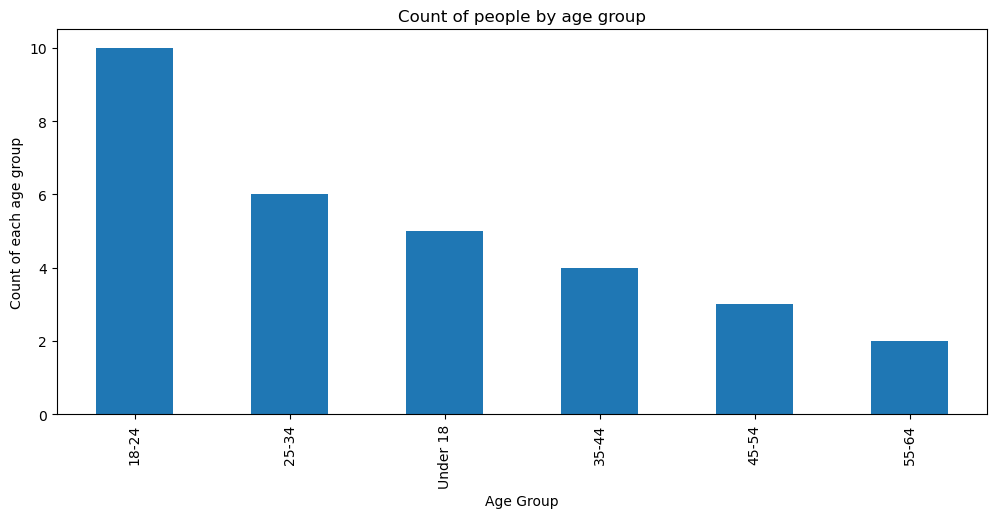

In [8]:
# Column information
print('Total Unique value in this column : ', Fitness_data['age'].nunique())
print('Unique value in this column', Fitness_data['age'].unique())

Fitness_data['age'].value_counts().plot(kind = 'bar' , title = 'Count of people by age group', 
                             figsize = (12,5) ,xlabel = 'Age Group', ylabel = 'Count of each age group')

## The above bar graph shows that people between 18 to 24 year are using fitness wearable most            || people who are older then 34 year are using it less 

Unique value in this column :  3


<AxesSubplot:title={'center':'Pie Chart of gender column by count'}, ylabel='Gender'>

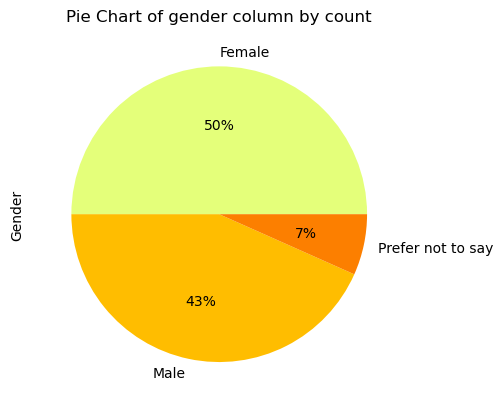

In [9]:
print('Unique value in this column : ', Fitness_data['Gender'].nunique())

Fitness_data['Gender'].value_counts().plot(kind = 'pie' , title = 'Pie Chart of gender column by count', 
                             autopct="%.0f%%", colormap='Wistia')

## Above pie chart indicates that female are using more Fitness wearable then male 
## 7 % people don't prefer to reveal their gender information

In [10]:
# Column information
print('Total Unique value in this column : ', Fitness_data['Education'].nunique())
print('Unique value in this column :-', Fitness_data['Education'].unique())

Total Unique value in this column :  6
Unique value in this column :- ['Some college or associate degree' "Bachelor's degree" "Master's degree"
 'High school diploma' 'Doctorate or professional degree'
 'Less than high school']


<AxesSubplot:title={'center':'Education of People who using Fitness wearable'}, ylabel='Count'>

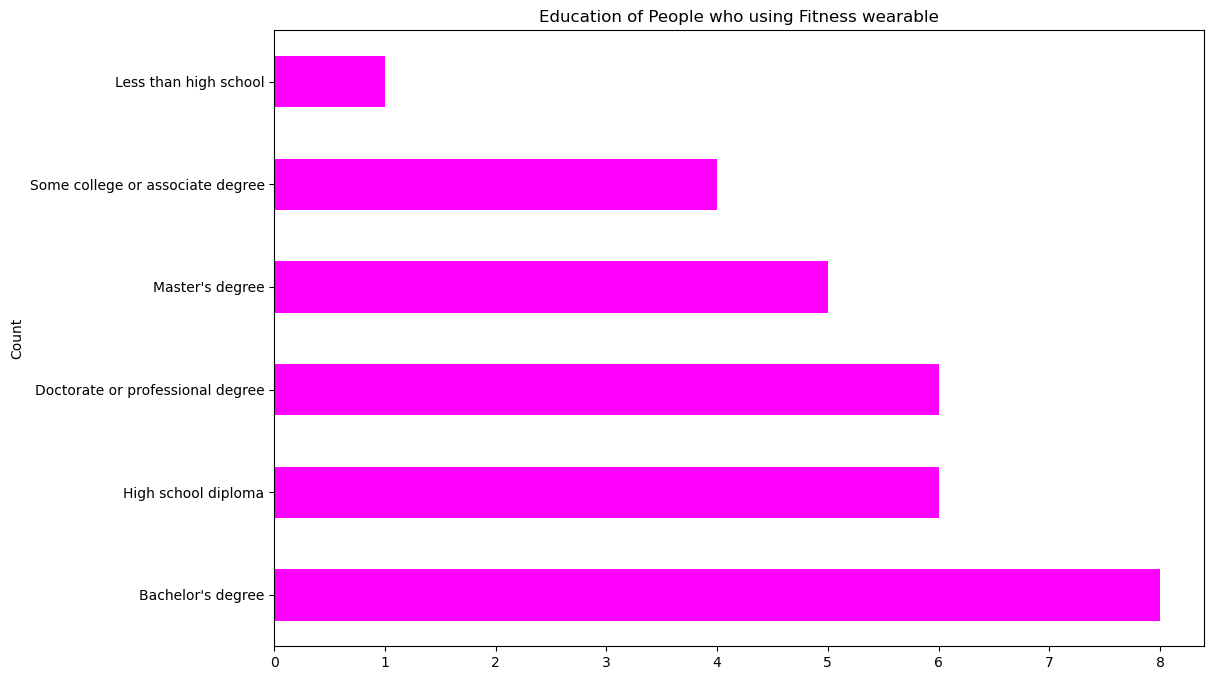

In [11]:
# Ploting the column
Fitness_data['Education'].value_counts().plot(kind = 'barh' , title = 'Education of People who using Fitness wearable', 
                             figsize = (12,8) ,xlabel = 'Count', ylabel = 'Heighest Education',colormap='spring')

## Most of the people studied till Highschool , people who studied less then highschool are not using Fitness wearable much

<AxesSubplot:title={'center':'Pie Chart of Occupation column by count'}, ylabel='Occupation'>

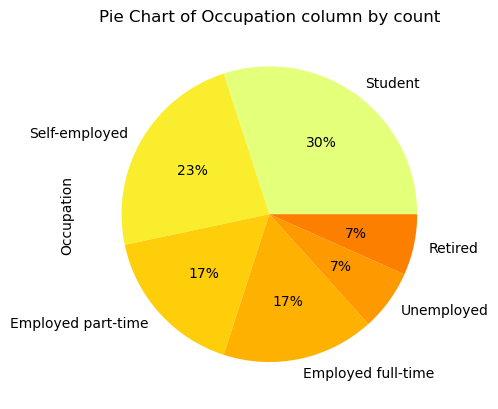

In [12]:
Fitness_data['Occupation'].value_counts().plot(kind = 'pie' , title = 'Pie Chart of Occupation column by count', 
                             autopct="%.0f%%", colormap='Wistia')

## 53 % percante people are either student or self employed

# Will continue this in upcoming version 